<a href="https://colab.research.google.com/github/RajSoumyadip/Car-Classification/blob/master/CarCalssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! git clone https://github.com/RajSoumyadip/Car-Classification.git

Cloning into 'Car-Classification'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (472/472), done.
remote: Compressing objects: 100% (469/469), done.
remote: Total 472 (delta 2), reused 472 (delta 2), pack-reused 0
Receiving objects: 100% (472/472), 49.52 MiB | 45.52 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [9]:
! ls

Car-Classification  drive  sample_data


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './Car-Classification/dataset/'

In [13]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)

There are  3 classes:
 ['Hyundai', 'Mercedes', 'Honda']


In [14]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Hyundai


Class: Mercedes


Class: Honda


In [0]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [16]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 370 training images and 92 validation images.


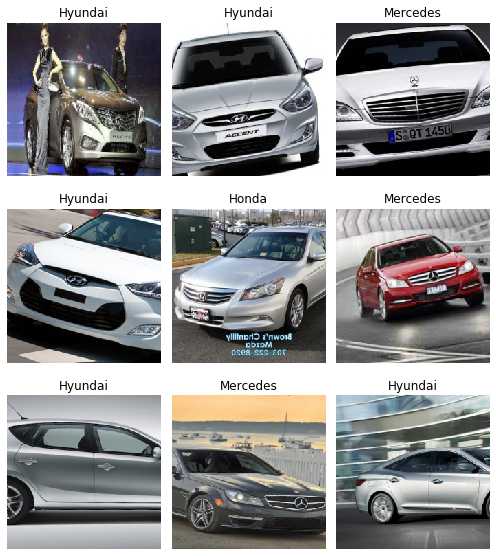

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 22.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


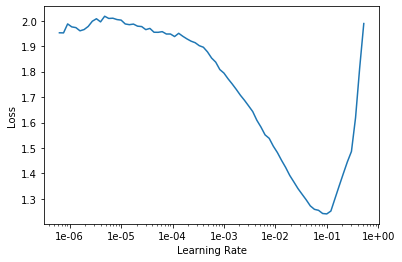

In [19]:
learn.lr_find();
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.522301,1.373847,0.597826,00:12
1,1.329947,0.795921,0.750000,00:11
2,1.035499,0.653105,0.804348,00:11
3,0.898007,0.614283,0.815217,00:11


In [21]:
interp = ClassificationInterpretation.from_learner(learn)

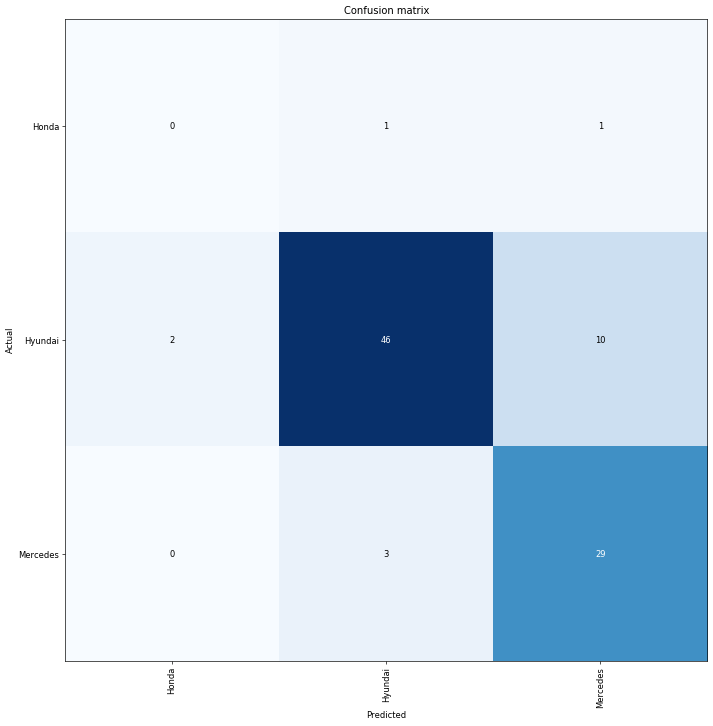

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

NotADirectoryError: ignored

In [32]:
! ls

 dataset  'Test Images'


In [24]:
! git pull

fatal: not a git repository (or any of the parent directories): .git


In [25]:
cd Car-Classification/

/content/Car-Classification


In [29]:
! ls

 dataset  'Test Images'


It is a Mercedes


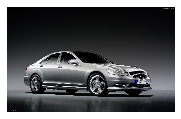

In [36]:
path = './Test Images'
img = open_image(get_image_files(path)[1])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

In [34]:
! os.path()

/bin/bash: -c: line 1: syntax error: unexpected end of file
